In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

# Introduction

### [Syllabus](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/June/5b1aec85_band-syllabus-v5-1/band-syllabus-v5-1.pdf)

### [Rubric](https://review.udacity.com/#!/rubrics/382/view)

### [Project Overview](https://classroom.udacity.com/nanodegrees/nd008t/parts/f2ec3aba-7d0e-4a88-8564-536d196b77f0/modules/fa6303d5-2abf-40dc-8230-fd7320eacc92/lessons/8207eb5c-8e75-4abb-aa72-f6f5c02bec25/concepts/c13ef592-7839-4a04-8acd-1edcff8b5470)

### [Data](./data)
* *[p2-2010-pawdacity-monthly-sales.csv](./data/p2-2010-pawdacity-monthly-sales-p2-2010-pawdacity-monthly-sales.csv)* - This file contains all of the monthly sales for all Pawdacity stores for 2010.

* *[p2-partially-parsed-wy-web-scrape.csv](./data/p2-partially-parsed-wy-web-scrape.csv)* - This is a partially parsed data file that can be used for population numbers.

* *[p2-wy-453910-naics-data.csv](./data/p2-wy-453910-naics-data.csv)* - NAICS data on the sales of all competitor stores where total sales is equal to 12 months of sales

* *[p2-wy-demographic-data.csv](./data/p2-wy-demographic-data.csv)* - This file contains demographic data for each city and county in Wyoming.

# Wrangle Data

In [2]:
#2010 monthly sales for stores
monthlySales_original = pd.read_csv("./data/p2-2010-pawdacity-monthly-sales-p2-2010-pawdacity-monthly-sales.csv")
monthlySales = monthlySales_original.copy()

# use for population
webScrape_original = pd.read_csv("./data/p2-partially-parsed-wy-web-scrape.csv")
webScrape = webScrape_original.copy()

# 12 month total sales cycle for competitor stores
naics_original = pd.read_csv("./data/p2-wy-453910-naics-data.csv")
naics = naics_original.copy()

# 
demographic_original = pd.read_csv("./data/p2-wy-demographic-data.csv")
demographic = demographic_original.copy()


### monthlySales

In [3]:
monthlySales.head(2)

,NAME,ADDRESS,CITY,STATE,ZIP,January,February,March,April,May,June,July,August,September,October,November,December
0,Pawdacity,509 Fort St # A,Buffalo,WY,82834,16200,13392,14688,17064,18360,14040,12960,19224,15984,13392,13176,16848
1,Pawdacity,601 SE Wyoming Blvd Unit 252,Casper,WY,82609,29160,21600,27000,27648,29160,27216,25488,25704,22896,25272,28944,27648


In [4]:
monthlySales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 17 columns):
NAME         11 non-null object
ADDRESS      11 non-null object
CITY         11 non-null object
STATE        11 non-null object
ZIP          11 non-null int64
January      11 non-null int64
February     11 non-null int64
March        11 non-null int64
April        11 non-null int64
May          11 non-null int64
June         11 non-null int64
July         11 non-null int64
August       11 non-null int64
September    11 non-null int64
October      11 non-null int64
November     11 non-null int64
December     11 non-null int64
dtypes: int64(13), object(4)
memory usage: 1.5+ KB


### Partially Parsed Data

In [5]:
webScrape.head()

,City|County,2014 Estimate,2010 Census,2000 Census
0,Afton|Lincoln,"<td>1,968</td>","<td>1,911</td>","<td>1,818</td>"
1,Albin|Laramie,<td>185</td>,<td>181</td>,<td>120</td>
2,Alpine|Lincoln,<td>845</td>,<td>828</td>,<td>550</td>
3,Baggs|Carbon,<td>439</td>,<td>440</td>,<td>348</td>
4,Bairoil|Sweetwater,<td>107</td>,<td>106</td>,<td>97</td>


In [6]:
webScrape.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
City|County      99 non-null object
2014 Estimate    103 non-null object
2010 Census      103 non-null object
2000 Census      103 non-null object
dtypes: object(4)
memory usage: 3.3+ KB


In [7]:
len(webScrape["City|County"].unique())

100

### Competitor Stores

In [8]:
naics.head(2)

,BUSINESS NAME,PHYSICAL CITY NAME,SALES VOLUME,CASS_LastLine
0,Mile High Mobile Pet LLC,Cheyenne,300000,"Cheyenne, WY 82007-3528"
1,Pets City Inc,Cheyenne,640000,"Cheyenne, WY 82009-4851"


In [9]:
naics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
BUSINESS NAME         32 non-null object
PHYSICAL CITY NAME    32 non-null object
SALES VOLUME          32 non-null int64
CASS_LastLine         32 non-null object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


### Demographics

In [10]:
demographic.head()

,City,County,Land Area,Households with Under 18,Population Density,Total Families
0,Laramie,Albany,2513.745235,2075,5.19,4668.93
1,Rock River,Albany,200.444000,165,0.41,372.30
2,Basin,Big Horn,543.951304,250,0.66,566.43
3,Burlington,Big Horn,137.646214,63,0.17,143.34
4,Byron,Big Horn,252.489592,116,0.31,262.93


In [11]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
City                        99 non-null object
County                      99 non-null object
Land Area                   99 non-null float64
Households with Under 18    99 non-null int64
Population Density          99 non-null float64
Total Families              99 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.7+ KB


# Clean Data

#### clean webScrape

In [12]:
# drop rows with null values

webScrape.dropna(inplace=True)
webScrape.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 4 columns):
City|County      99 non-null object
2014 Estimate    99 non-null object
2010 Census      99 non-null object
2000 Census      99 non-null object
dtypes: object(4)
memory usage: 3.9+ KB


In [13]:
# cleanup partially parsed data
# str_cols = webScrape.select_dtypes(['object']).columns
# should I drop fow 7 since 2000 Census is not available or just set value to nil?

strings_List = ['<sup id="cite_ref-4" class="reference"><a href="#cite_note-4">\[4\]</a></sup></td>',
                '<sup id="cite_ref-5" class="reference"><a href="#cite_note-5">\[5\]</a></sup></td>',
                '/',
                '<td>',
                '\?',
                '-',
                ','
               ]
for text in strings_List:
    webScrape.replace(text, '',regex=True, inplace = True)

In [14]:
# splitting city|county
webScrape['City'] = webScrape['City|County'].str.split('|').apply(lambda x: x[0])

# removing additional whitspace at the end of strings (e.g. Basin at index 6)
webScrape['City'] = webScrape['City'].str.rstrip()

In [15]:
# dropping Big River since 2000 Census is empty
# webScrape = webScrape[webScrape['City|County'] != 'Bear River|Uinta']

# dropping 2000 Census column since only using 2010 data, which also allows me to keep row for Big River at index 7, and convert columns to int
# webScrape = webScrape[['City|County', 'City', '2014 Estimate', '2010 Census']]

In [16]:
webScrape.head(8)

,City|County,2014 Estimate,2010 Census,2000 Census,City
0,Afton|Lincoln,1968,1911,1818,Afton
1,Albin|Laramie,185,181,120,Albin
2,Alpine|Lincoln,845,828,550,Alpine
3,Baggs|Carbon,439,440,348,Baggs
4,Bairoil|Sweetwater,107,106,97,Bairoil
5,Bar Nunn|Natrona,2735,2213,936,Bar Nunn
6,Basin |Big Horn,1312,1285,1238,Basin
7,Bear River|Uinta,521,518,,Bear River


In [17]:
# webScrape[['2014 Estimate', '2010 Census', '2000 Census']] = webScrape[['2014 Estimate', '2010 Census', '2000 Census']].astype(int)
webScrape[['2014 Estimate', '2010 Census']] = webScrape[['2014 Estimate', '2010 Census']].astype(int)
webScrape.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 5 columns):
City|County      99 non-null object
2014 Estimate    99 non-null int64
2010 Census      99 non-null int64
2000 Census      99 non-null object
City             99 non-null object
dtypes: int64(2), object(3)
memory usage: 4.6+ KB


#### clean monthlySales

In [18]:
monthlySales.rename(columns = {'CITY':'City'}, inplace=True)
monthlySales.columns


Index(['NAME', 'ADDRESS', 'City', 'STATE', 'ZIP', 'January', 'February',
       'March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December'],
      dtype='object')

In [19]:
monthlySales['Total Sales'] = monthlySales[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']].sum(axis=1)

#### clean naics

In [20]:
naics.rename(columns = {'PHYSICAL CITY NAME': 'City'}, inplace=True)

In [21]:
naics.columns

Index(['BUSINESS NAME', 'City', 'SALES VOLUME', 'CASS_LastLine'], dtype='object')

#### clean demographic

In [22]:
# there are no known issues to clean

#### merge data

Create a dataset with the following columns
* City
* 2010 Census Population
* Total Pawdacity Sales
* Households with Under 18
* Land Area
* Population Density
* Total Families

In [23]:
columnHeaders = ['City', '2010 Census Population', 'Total Pawdacity Sales by Store', 'Households with Under 18', 'Land Area', 'Population Density', 'Total Families']


In [24]:
demographic.columns

Index(['City', 'County', 'Land Area', 'Households with Under 18',
       'Population Density', 'Total Families'],
      dtype='object')

In [25]:
# use how='inner' if you are only merging data for pawdacity stores
df_merged = webScrape[['City', '2010 Census']].merge(monthlySales[['City', 'Total Sales']], left_on='City', right_on='City',suffixes=('_x','_y'), how='inner')
df_merged = df_merged.merge(demographic[['City', 'Households with Under 18', 'Land Area', 'Population Density', 'Total Families']], left_on='City', right_on='City', suffixes=('_x','_y'), how='inner')

# This is my training set
df_merged


,City,2010 Census,Total Sales,Households with Under 18,Land Area,Population Density,Total Families
0,Buffalo,4585,185328,746,3115.507500,1.55,1819.50
1,Casper,35316,317736,7788,3894.309100,11.16,8756.32
2,Cheyenne,59466,917892,7158,1500.178400,20.34,14612.64
3,Cody,9520,218376,1403,2998.956960,1.82,3515.62
4,Douglas,6120,208008,832,1829.465100,1.46,1744.08
5,Evanston,12359,283824,1486,999.497100,4.95,2712.64
6,Gillette,29087,543132,4052,2748.852900,5.80,7189.43
7,Powell,6314,233928,1251,2673.574550,1.62,3134.18
8,Riverton,10615,303264,2680,4796.859815,2.34,5556.49
9,Rock Springs,23036,253584,4022,6620.201916,2.78,7572.18


# Analyze Data

If you’ve done everything correctly, the sum for each of the above columns should be:
* Census Population: 213,862
* Total Pawdacity Sales: 3,773,304
* Households with Under 18: 34,064
* Land Area: 33,071
* Population Density: 63
* Total Families: 62,653


### Sum and Average

In [26]:
# calculating sum of training set
columnSum = ['Column', 'Sum']
df_merged_sum = df_merged.sum()
df_merged_sum = pd.DataFrame(df_merged_sum)
df_merged_sum.reset_index(inplace=True)
df_merged_sum.columns = columnSum
df_merged_sum

,Column,Sum
0,City,BuffaloCasperCheyenneCodyDouglasEvanstonGillet...
1,2010 Census,213862
2,Total Sales,3773304
3,Households with Under 18,34064
4,Land Area,33071.4
5,Population Density,62.8
6,Total Families,62652.8


In [27]:
# calculating average of training set
columnMean = ['Column', 'Average']
df_merged_mean = df_merged.mean()
df_merged_mean = pd.DataFrame(df_merged_mean)
df_merged_mean.reset_index(inplace=True)
df_merged_mean.columns = columnMean
df_merged_mean

,Column,Average
0,2010 Census,19442.000000
1,Total Sales,343027.636364
2,Households with Under 18,3096.727273
3,Land Area,3006.489126
4,Population Density,5.709091
5,Total Families,5695.708182


In [28]:
# creating dataframe to display both sum and average of training set
calc_stats = df_merged_sum.merge(df_merged_mean, left_on='Column', right_on='Column')

calc_stats['Sum'] = calc_stats['Sum'].astype(float).round()
calc_stats['Average'] = calc_stats['Average'].astype(float).round(2)

calc_stats

,Column,Sum,Average
0,2010 Census,213862.0,19442.00
1,Total Sales,3773304.0,343027.64
2,Households with Under 18,34064.0,3096.73
3,Land Area,33071.0,3006.49
4,Population Density,63.0,5.71
5,Total Families,62653.0,5695.71


In [29]:
df_stats = df_merged.describe()
df_stats

,2010 Census,Total Sales,Households with Under 18,Land Area,Population Density,Total Families
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,19442.000000,343027.636364,3096.727273,3006.489126,5.709091,5695.708182
std,16616.018584,213538.712215,2453.003061,1617.460342,5.849685,3816.049660
min,4585.000000,185328.000000,746.000000,999.497100,1.460000,1744.080000
25%,7917.000000,226152.000000,1327.000000,1861.721074,1.720000,2923.410000
50%,12359.000000,283824.000000,2646.000000,2748.852900,2.780000,5556.490000
75%,26061.500000,312984.000000,4037.000000,3504.908300,7.390000,7380.805000
max,59466.000000,917892.000000,7788.000000,6620.201916,20.340000,14612.640000


In [30]:
# Find Outliers by calculating interquartile ranges

In [31]:
iqr(df_stats['2010 Census'])


14012.875

In [32]:
# building stats datafarme with interquartile ranges using iqr() funciton
# https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32
df_New = pd.DataFrame({'Stats': ['Q1', 'Q3', 'IQR','Lower Bound', 'Upper Bound']})

for i in df_stats.columns:
    tempList = []
    
    q1, q3= np.percentile(df_stats[[i]],[25,75])
    #iqr = q3 - q1
    IQR = iqr(df_stats[i])
#     lower_bound = q1 - (1.5 * q1)
#     upper_bound = q3 + (1.5 * q3)
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    
    df_New[i] = [q1, q3, IQR, lower_bound, upper_bound]

df_New

,Stats,2010 Census,Total Sales,Households with Under 18,Land Area,Population Density,Total Families
0,Q1,7084.0000,206486.034161,1181.750000,1462.969532,2.51500,2628.577500
1,Q3,21096.8750,320494.909091,3331.795455,3131.093920,8.29250,6116.982386
2,IQR,14012.8750,114008.874930,2150.045455,1668.124388,5.77750,3488.404886
3,Lower Bound,-13935.3125,35472.721766,-2043.318182,-1039.217050,-6.15125,-2604.029830
4,Upper Bound,42116.1875,491508.221486,6556.863636,5633.280501,16.95875,11349.589716


In [33]:
df_New.set_index('Stats', inplace=True)
df_New

,2010 Census,Total Sales,Households with Under 18,Land Area,Population Density,Total Families
Stats,,,,,,
Q1,7084.0000,206486.034161,1181.750000,1462.969532,2.51500,2628.577500
Q3,21096.8750,320494.909091,3331.795455,3131.093920,8.29250,6116.982386
IQR,14012.8750,114008.874930,2150.045455,1668.124388,5.77750,3488.404886
Lower Bound,-13935.3125,35472.721766,-2043.318182,-1039.217050,-6.15125,-2604.029830
Upper Bound,42116.1875,491508.221486,6556.863636,5633.280501,16.95875,11349.589716


### Outliers

In [34]:
# building dataset of outliers
cols = ['Outlier']
columns = ['2010 Census','Total Sales','Households with Under 18','Land Area','Population Density','Total Families']
outlierList = []
cityList = []
df_outliers = pd.DataFrame()

def outliers(city):    
    for i in columns:
        tempList = []
        possOutlier = df_merged.loc[df_merged.City == city, i:i ].values[0][0]
        lower = df_New.loc['Lower Bound':'Lower Bound', i:i].values[0][0]
        upper = df_New.loc['Upper Bound':'Upper Bound', i:i].values[0][0]
        outlier = (possOutlier < lower) | (possOutlier > upper)
        if outlier:
            tempList.append(city)
            tempList.append(i)        
            tempList.append(possOutlier)
            tempList.append(lower)
            tempList.append(upper)
            outlierList.append(tempList)

for i in df_merged.City:
    outliers(i)

In [35]:
len(outlierList)

8

In [36]:
print(outlierList[0])

['Casper', 'Households with Under 18', 7788, -2043.318181818182, 6556.863636363636]


In [37]:
Outliers = pd.DataFrame(outlierList, columns=['City', 'Outlier Feature', 'Outlier Value', 'Lower Bound', 'Upper Bound'])
Outliers 

,City,Outlier Feature,Outlier Value,Lower Bound,Upper Bound
0,Casper,Households with Under 18,7788.000000,-2043.318182,6556.863636
1,Cheyenne,2010 Census,59466.000000,-13935.312500,42116.187500
2,Cheyenne,Total Sales,917892.000000,35472.721766,491508.221486
3,Cheyenne,Households with Under 18,7158.000000,-2043.318182,6556.863636
4,Cheyenne,Population Density,20.340000,-6.151250,16.958750
5,Cheyenne,Total Families,14612.640000,-2604.029830,11349.589716
6,Gillette,Total Sales,543132.000000,35472.721766,491508.221486
7,Rock Springs,Land Area,6620.201916,-1039.217050,5633.280501


In [38]:
df_New

,2010 Census,Total Sales,Households with Under 18,Land Area,Population Density,Total Families
Stats,,,,,,
Q1,7084.0000,206486.034161,1181.750000,1462.969532,2.51500,2628.577500
Q3,21096.8750,320494.909091,3331.795455,3131.093920,8.29250,6116.982386
IQR,14012.8750,114008.874930,2150.045455,1668.124388,5.77750,3488.404886
Lower Bound,-13935.3125,35472.721766,-2043.318182,-1039.217050,-6.15125,-2604.029830
Upper Bound,42116.1875,491508.221486,6556.863636,5633.280501,16.95875,11349.589716


In [39]:
# consider Total Families in city as a factor of Total Sales
df_Revenue_to_Families = df_merged.copy()
strFamil = "Annual Store Revenue Per Family Count"
df_Revenue_to_Families[strFamil] = (df_Revenue_to_Families['Total Sales'] / df_Revenue_to_Families['Total Families']).round()
df_Revenue_to_Families = df_Revenue_to_Families[["City", "Total Sales", "Total Families", "Population Density", strFamil]]
df_Revenue_to_Families.sort_values(strFamil,ascending=False)

,City,Total Sales,Total Families,Population Density,Annual Store Revenue Per Family Count
4,Douglas,208008,1744.08,1.46,119.0
5,Evanston,283824,2712.64,4.95,105.0
0,Buffalo,185328,1819.50,1.55,102.0
6,Gillette,543132,7189.43,5.80,76.0
7,Powell,233928,3134.18,1.62,75.0
2,Cheyenne,917892,14612.64,20.34,63.0
3,Cody,218376,3515.62,1.82,62.0
8,Riverton,303264,5556.49,2.34,55.0
10,Sheridan,308232,6039.71,8.98,51.0
1,Casper,317736,8756.32,11.16,36.0


In [40]:
for i in df_stats.columns:
    print(i)

2010 Census
Total Sales
Households with Under 18
Land Area
Population Density
Total Families


In [41]:
columns_xVars = ["2010 Census",
                 "Households with Under 18",
                 "Land Area",
                 "Population Density",
                 "Total Families"
                       ]

# Visualize Data




In [42]:


# fig,ax = plt.subplots()
# ax = plt.subplots()

# df_merged

In [43]:
df_merged_Cheyenne = df_merged.copy()

df_merged_NOCheyenne = df_merged.copy()
df_merged_NOCheyenne = df_merged_NOCheyenne[df_merged_NOCheyenne['City'] != "Cheyenne"]

df_merged_Cheyenne['Dataset'] = 'Outlier Kept'
df_merged_NOCheyenne['Dataset'] = 'Outlier Removed'

df_append_Outliers = df_merged_Cheyenne.append(df_merged_NOCheyenne,ignore_index=True)
df_append_Outliers

,City,2010 Census,Total Sales,Households with Under 18,Land Area,Population Density,Total Families,Dataset
0,Buffalo,4585,185328,746,3115.507500,1.55,1819.50,Outlier Kept
1,Casper,35316,317736,7788,3894.309100,11.16,8756.32,Outlier Kept
2,Cheyenne,59466,917892,7158,1500.178400,20.34,14612.64,Outlier Kept
3,Cody,9520,218376,1403,2998.956960,1.82,3515.62,Outlier Kept
4,Douglas,6120,208008,832,1829.465100,1.46,1744.08,Outlier Kept
5,Evanston,12359,283824,1486,999.497100,4.95,2712.64,Outlier Kept
6,Gillette,29087,543132,4052,2748.852900,5.80,7189.43,Outlier Kept
7,Powell,6314,233928,1251,2673.574550,1.62,3134.18,Outlier Kept
8,Riverton,10615,303264,2680,4796.859815,2.34,5556.49,Outlier Kept
9,Rock Springs,23036,253584,4022,6620.201916,2.78,7572.18,Outlier Kept


In [44]:
# df_append_Outliers.sort_values("2010 Census")
# df_append_Outliers.sort_values("Land Area")

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


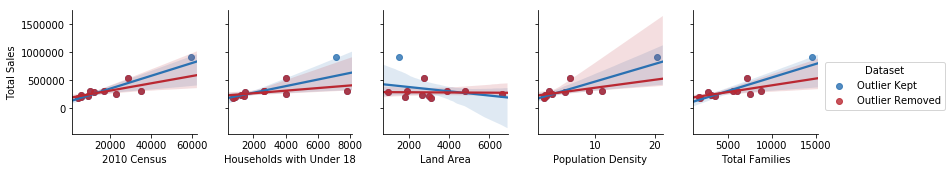

In [45]:
# df_append_Outliers
cmap = sns.color_palette("RdBu_r",7)
g = sns.pairplot(df_append_Outliers, x_vars=columns_xVars, y_vars='Total Sales', aspect=.9,kind='reg', hue='Dataset', palette=[cmap[0],cmap[6]])
g.savefig('./assets/figure.png', figsize=(1,3) , dpi=300)
g

# g = sns.pairplot(df_append_Outliers, x_vars=columns_xVars, y_vars='Total Sales', height = 7, aspect=.9,kind='reg', hue='Dataset', palette=['#6d9eeb','#e06666'])
# g.savefig('./assets/figure.png', figsize=(3,10) , dpi=1000)

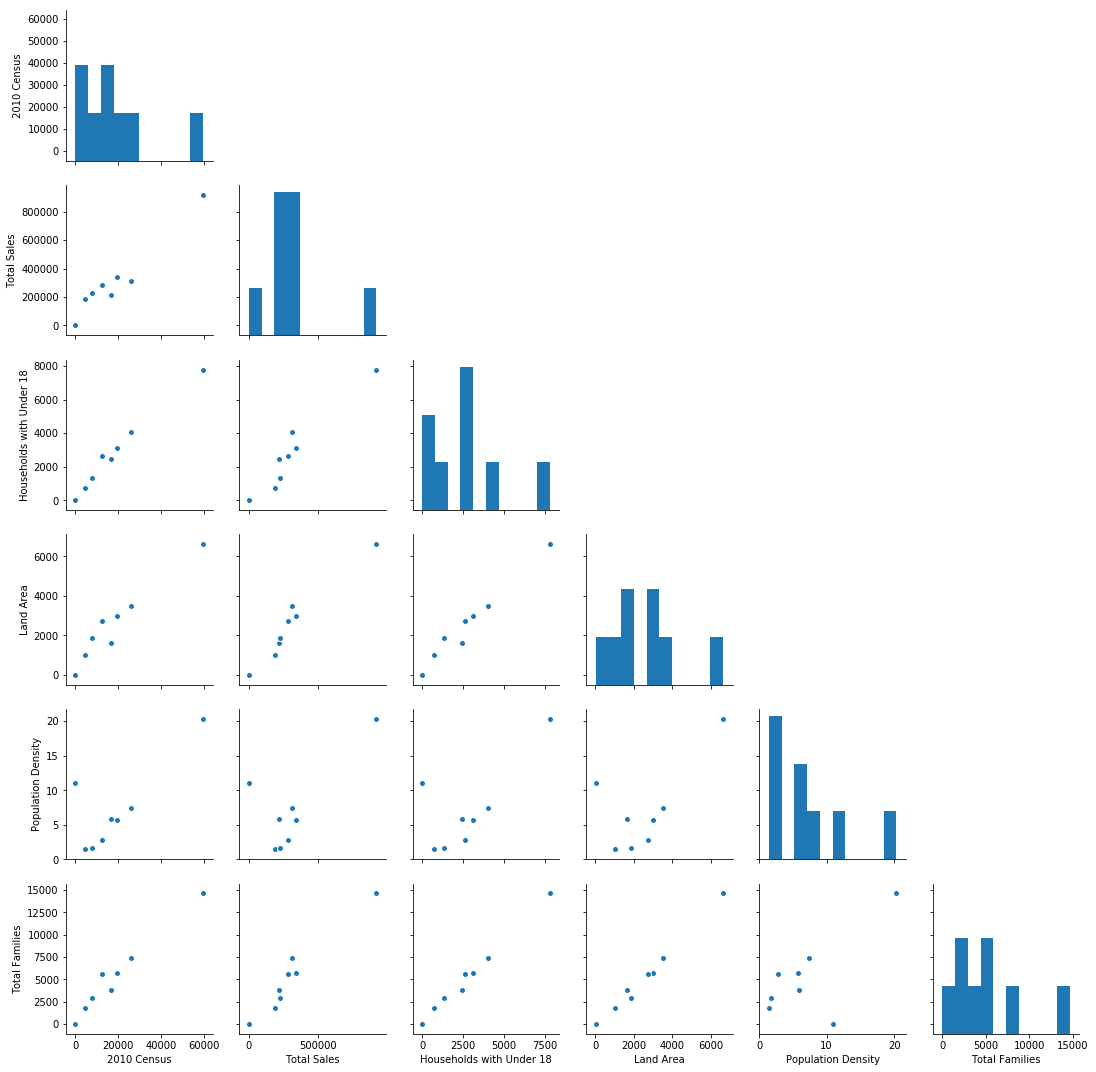

In [46]:
# Scatter Plot Matrix
# just another way to look for correlation
g = sns.pairplot(df_stats)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

# Final Outlier Removal

In [47]:
df_merged = df_merged.loc[~(df_merged.City == "Gillette"), :]
df_merged


,City,2010 Census,Total Sales,Households with Under 18,Land Area,Population Density,Total Families
0,Buffalo,4585,185328,746,3115.507500,1.55,1819.50
1,Casper,35316,317736,7788,3894.309100,11.16,8756.32
2,Cheyenne,59466,917892,7158,1500.178400,20.34,14612.64
3,Cody,9520,218376,1403,2998.956960,1.82,3515.62
4,Douglas,6120,208008,832,1829.465100,1.46,1744.08
5,Evanston,12359,283824,1486,999.497100,4.95,2712.64
7,Powell,6314,233928,1251,2673.574550,1.62,3134.18
8,Riverton,10615,303264,2680,4796.859815,2.34,5556.49
9,Rock Springs,23036,253584,4022,6620.201916,2.78,7572.18
10,Sheridan,17444,308232,2646,1893.977048,8.98,6039.71


# Conclusion

I cannot find a reasonable argument to remove Casper, Cheyenne, or Rock Springs based on their outlier values (i.e. incorrect data entry, or comparing observed values against other factors) and can only conclude their outliers values are valid data entries. However, due to a possible skew in demographics (e.g. Gillette could have a largely affluent population) that leads to high sales uncommon to what data suggests cities with smaller population density have (i.e. lower total sales, while cities with high population density have higher total sales) Gillette has been removed from the training set.

In [48]:
# writing training set out to csv
df_merged.to_csv("./data/trainingSet.csv")